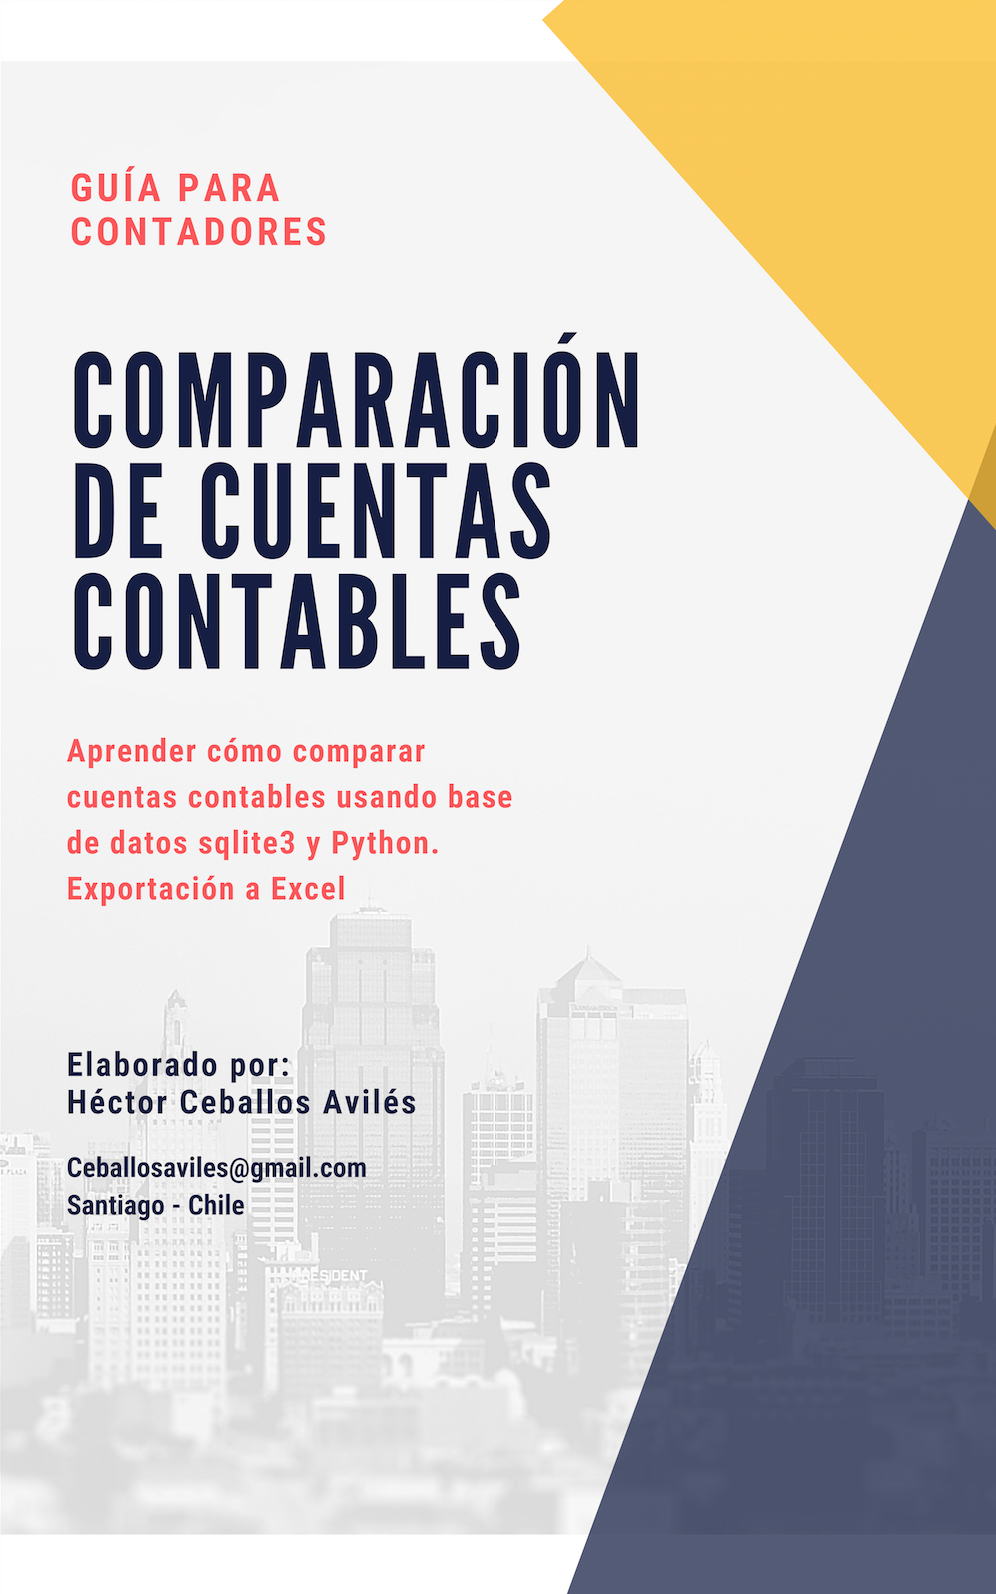

In [82]:
from IPython.display import Image
Image(filename='caratula.png')

¡Hola! Soy Héctor.  

Soy Contador Auditor, y me encanta la música, el ajedrez, y más recientemente tengo una obsesión con el lenguaje de programación Python . Tanto es así que decidí iniciar un pequeño blog divertido para documentar mis aventuras explorando su utilidad en el mundo de la contabilidad.  


Si eres un contador que nunca ha oído hablar de Python o si has oído hablar de él pero no lo has usado, este es el blog para ti.  Te aliento a dejar comentarios y sugerencias sobre temas futuros para que podamos explorar Python juntos.  
Envíame cualquier idea que tengas a ceballosaviles@gmail.com.

Las publicaciones estarán en mi [Github](https://github.com/hceballos), en una de las siguientes categorías: 

#### •	Contador Auditor.
#### •	Control de Gestión.
#### •	Análisis de Datos.  

Siéntete libre de descargar y utilizar mi contenido.   


Saludos,
#### Héctor Ceballos 
## --------------------------------------------------------------------------------------------


  
Sin vueltas, vamos al grano.

### ¿QUÉ se quiere hacer?  
Comparar los saldos de todas las cuentas contables de la misma entidad en otras fechas, respecto de su saldo actual, saldo de hace 1 semana, 1 mes y 1 año.


### ¿POR QUÉ se quiere hacer?
Si la información financiera de una empresa no es comparable, no es útil.<br>
La comparabilidad permite contrastar la información contable y ayuda a tomar mejores decisiones.

### ¿PARA QUÉ se quiere hacer?
Para permitir a los usuarios identificar y analizar las diferencias y similitudes con la información de la misma entidad a lo largo del tiempo.

### ¿CUÁNTO se quiere hacer?
METAS<br>
1) Reemplazar los procesos manuales que muchas personas usan para manipular datos en Excel y/o Access.<br>
2) Potenciar el rendimiento en el análisis de información.

### ¿CÓMO se va hacer?
1) Importación de librerias.<br>
2) Conección con base de datos<br>
3) Construir consulta por según saldos de la semana actual.<br>
4) Construir consulta por según saldos de la semana anterior.<br>
5) Construir consulta por según saldos del mes anterior.<br>
6) Construir consulta por según saldos del año anterior.<br>
7) Exportar informacion a formato Excel.<br>
8) Exportar informacion a formato HTML.<br>

### ¿A QUIÉNES va dirigido?
Esta guía está dirigida a todos aquellos contadores y profesionales en general que buscan ampliar sus conocimientos sobre el manejo de grandes volúmenes de información, generar información util y aumentar el rendimiento del trabajo diario.

### 1) Importación de librerias.

In [83]:
import sqlite3
import numpy as np
import pandas as pd

### 2) Conección con base de datos.

In [84]:
cnx = sqlite3.connect('data.db')

### 3) Construir consulta por según saldos de la semana actual.

In [85]:
SELECT 
    *
FROM
    (SELECT 
        cuenta, 
        Sum(debe-haber) AS current_week 
    FROM 
        MovimientosTabla 
    WHERE 
        fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW') 
    GROUP BY 
        cuenta 
    HAVING 
        cuenta LIKE '%' 
        AND [current_week]<>0 
    ORDER BY 
        cuenta asc 
    )

IndentationError: unexpected indent (<ipython-input-85-53578b60c41d>, line 2)

### 4) Construir consulta por según saldos de la semana anterior.

In [ ]:
SELECT 
    *
FROM
    (SELECT 
        cuenta, 
        Sum(debe-haber) AS last_week 
    FROM 
        MovimientosTabla 
    WHERE 
        fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-7 DAYS') 
    GROUP BY 
        cuenta 
    HAVING 
        cuenta LIKE '%' 
        AND [last_week]<>0 
    ORDER BY 
        cuenta asc 
    )

### 5) Construir consulta por según saldos del mes anterior.

In [ ]:
SELECT 
    *
FROM
    (SELECT 
        cuenta, 
        Sum(debe-haber) AS last_month 
    FROM 
        MovimientosTabla 
    WHERE 
        fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 MONTHS') 
    GROUP BY 
        cuenta 
    HAVING 
        cuenta LIKE '%' 
        AND 
        [last_month]<>0 
    ORDER BY 
        cuenta asc 
    )

### 6) Construir consulta por según saldos del año anterior.

In [ ]:
SELECT 
    *
FROM
    (SELECT 
        cuenta, 
        Sum(debe-haber) AS last_year 
    FROM 
        MovimientosTabla 
    WHERE 
        fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 YEAR') 
    GROUP BY 
        cuenta 
    HAVING 
        cuenta LIKE '%' 
        AND 
        [last_year]<>0 
    ORDER BY 
        cuenta asc 
    )

### 7) Exportar informacion a formato Excel.

In [ ]:
writer = pd.ExcelWriter('Comparabilidad_de_estados_financieros.xlsx', engine='xlsxwriter')
datos.to_excel(writer, sheet_name='Todas las cuentas')
writer.save()

### 8) Exportar informacion a formato HTML.

In [ ]:
datos.to_html('Comparabilidad_de_estados_financieros.html')

### Código Completo:
El código tambien está disponible [Aquí](https://github.com/hceballos/Contador-Auditor) .<br>
Siéntete libre de descargar y utilizar mi contenido.

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sqlite3
import numpy as np
import pandas as pd

cnx = sqlite3.connect('data.db')

consulta  = "SELECT \
t_last_year.cuenta as CUENTA, \
last_year as [AÑO PASADO], \
last_month as [MES PASADO], \
last_week as [SEMANA PASADA], \
current_week as [SEMANA ACTUAL] \
FROM \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_year \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 YEAR') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_year]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_year \
 \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_month \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-1 MONTHS') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_month]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_month \
 \
ON t_last_month.cuenta = t_last_year.cuenta \
 \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS last_week \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW', '-7 DAYS') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[last_week]<>0 \
	ORDER BY \
		cuenta asc \
	)t_last_week \
 \
ON t_last_week.cuenta = t_last_year.cuenta \
LEFT JOIN \
	(SELECT \
		cuenta, \
		Sum(debe-haber) AS current_week \
	FROM \
		MovimientosTabla \
	WHERE \
		fecha between date('NOW', '-5 YEARS', 'START OF YEAR') and date('NOW') \
	GROUP BY \
		cuenta \
	HAVING \
		cuenta LIKE '%' \
		AND \
		[current_week]<>0 \
	ORDER BY \
		cuenta asc \
    )t_current_week \
ON t_current_week.cuenta = t_last_year.cuenta;"

datos = pd.read_sql_query(consulta, cnx)

writer = pd.ExcelWriter('Comparabilidad_de_estados_financieros.xlsx', engine='xlsxwriter')
datos.to_excel(writer, sheet_name='Todas las cuentas')
writer.save()

datos.to_html('Comparabilidad_de_estados_financieros.html')